# Análisis Exploratorio
## Tema 13: Identificación de menciones de entidades biomédicas en resúmenes de investigación

Integrantes:
- José Ricardo Méndez González, 21289
- Sara María Pérez Echeverría, 21371
- Emily Elvia Melissa Pérez Alarcón, 21385
- Adrian Fulladolsa Palma, 21592

### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Importación de los datos

In [2]:
# path de la data
data_path = '../data/'

# cargar data
abstracts_train = pd.read_csv(data_path + 'abstracts_train.csv', on_bad_lines='skip', delimiter='\t')
entities_train = pd.read_csv(data_path + 'entities_train.csv', on_bad_lines='skip', delimiter='\t')
relations_train = pd.read_csv(data_path + 'relations_train.csv', on_bad_lines='skip', delimiter='\t')
abstracts_test = pd.read_csv(data_path + 'abstracts_test.csv', on_bad_lines='skip', delimiter='\t')

### Resumen de los dataframes

In [3]:
# resumen de los conjuntos de datos
print("Abstracts Train Dataset:")
print(abstracts_train.info())

print("\nEntities Train Dataset:")
print(entities_train.info())

print("\nRelations Train Dataset:")
print(relations_train.info())

print("\nAbstracts Test Dataset:")
print(abstracts_test.info())

Abstracts Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   abstract_id  400 non-null    int64 
 1   title        400 non-null    object
 2   abstract     400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB
None

Entities Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             13636 non-null  int64 
 1   abstract_id    13636 non-null  int64 
 2   offset_start   13636 non-null  int64 
 3   offset_finish  13636 non-null  int64 
 4   type           13636 non-null  object
 5   mention        13636 non-null  object
 6   entity_ids     13636 non-null  object
dtypes: int64(4), object(3)
memory usage: 745.8+ KB
None

Relations Train Dataset:
<class '

In [4]:
# revisar para valores nulos/faltantes
print("Missing values in abstracts_train:")
print(abstracts_train.isnull().sum())

print("\nMissing values in entities_train:")
print(entities_train.isnull().sum())

print("\nMissing values in relations_train:")
print(relations_train.isnull().sum())

Missing values in abstracts_train:
abstract_id    0
title          0
abstract       0
dtype: int64

Missing values in entities_train:
id               0
abstract_id      0
offset_start     0
offset_finish    0
type             0
mention          0
entity_ids       0
dtype: int64

Missing values in relations_train:
id             0
abstract_id    0
type           0
entity_1_id    0
entity_2_id    0
novel          0
dtype: int64


### Exploración

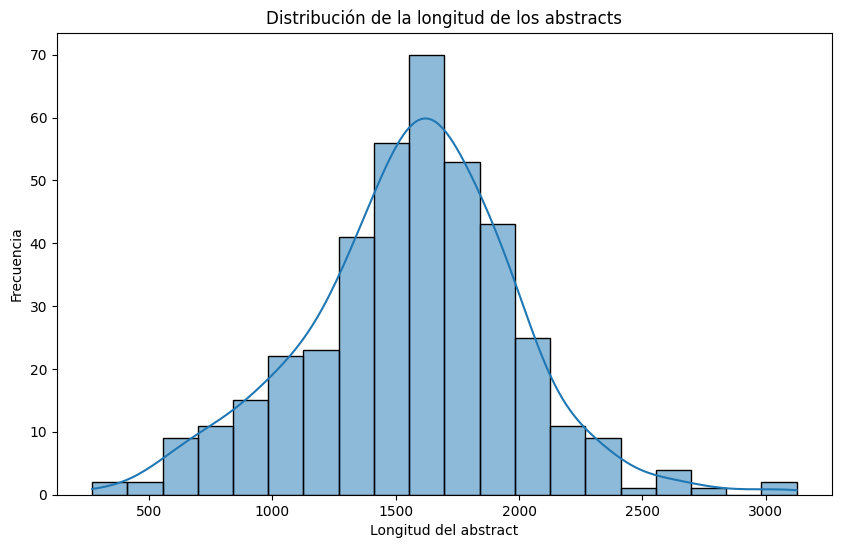

In [5]:
# analizar la longitud de los abstracts
abstracts_train['abstract_length'] = abstracts_train['abstract'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# visualizar la distribución de las longitudes de los abstracts
plt.figure(figsize=(10, 6))
sns.histplot(abstracts_train['abstract_length'], bins=20, kde=True)
plt.title("Distribución de la longitud de los abstracts")
plt.xlabel("Longitud del abstract")
plt.ylabel("Frecuencia")
plt.show()

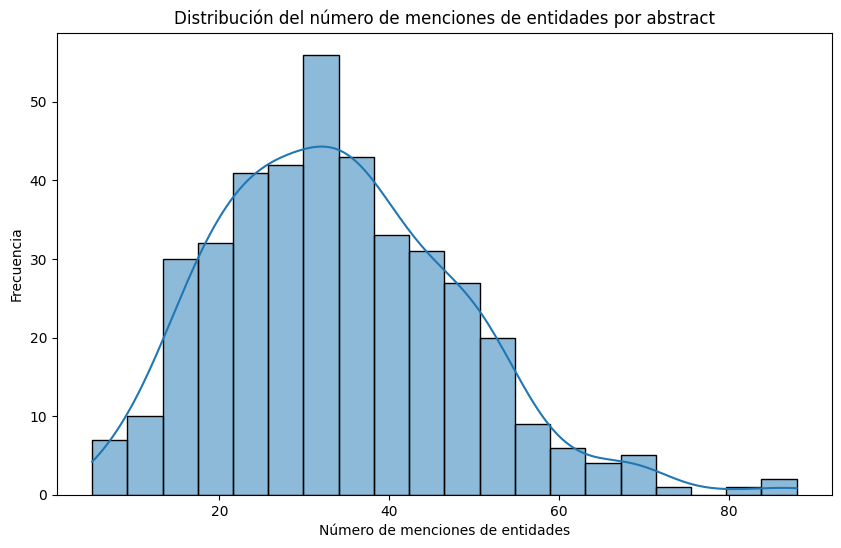

In [6]:
# cuenta de menciones de entidades por abstract
entity_counts = entities_train['abstract_id'].value_counts()

# visualizar la distribución del número de menciones por abstract
plt.figure(figsize=(10, 6))
sns.histplot(entity_counts, bins=20, kde=True)
plt.title("Distribución del número de menciones de entidades por abstract")
plt.xlabel("Número de menciones de entidades")
plt.ylabel("Frecuencia")
plt.show()

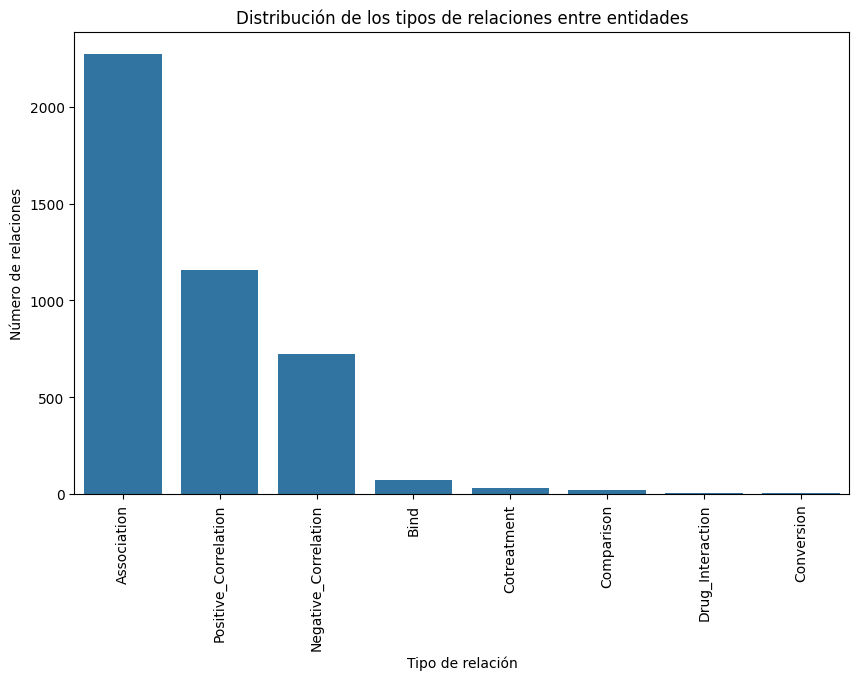

In [7]:
# Contar las relaciones por tipo
relation_types = relations_train['type'].value_counts()

# Visualizar la distribución de los tipos de relaciones
plt.figure(figsize=(10, 6))
sns.barplot(x=relation_types.index, y=relation_types.values)
plt.title("Distribución de los tipos de relaciones entre entidades")
plt.xticks(rotation=90)
plt.xlabel("Tipo de relación")
plt.ylabel("Número de relaciones")
plt.show()